In [2]:
from numpy import pi, sin, sqrt, empty, linspace
from numpy.linalg import eigvalsh

In [4]:
hbar=1.0546e-34
q=1.602e-19
M=9.1094e-31
L=5e-10
a=10*q
N=10
to_print=10

In [6]:
def H(m,n):
    if m==n:
        return pi*pi*m*m*hbar*hbar/(2*L*L*M)+.5*a
    if (m+n)%2==0:
        return 0.0
    return -8*a*m*n/(pi*pi*((m*m-n*n)**2))

In [7]:
Hmat=empty([N,N])
for m in range(N):
    for n in range(N):
        Hmat[m,n]=H(m+1,n+1)

In [8]:
value=eigvalsh(Hmat)

In [10]:
print(value/1e-19)

[   9.35041639   17.9136504    29.90143239   46.69522729   68.34317067
   94.8288196   126.14354628  162.28431039  203.24751911  249.23861693]


In [11]:
1j

1j

In [13]:
import numpy as np, matplotlib.pyplot as plt
from matplotlib import animation
from numpy.random import random as rand

In [14]:
# Set number of steps for each random walk.
num_steps = 100
# Create an empty figure of the desired size.
plt.close('all')	# Clear anything left over from prior runs.
bound = 20
fig = plt.figure()	# Must have figure object for movie.
ax = plt.axes(xlim=(-bound, bound), ylim=(-bound, bound))
# Create empty line and point objects with no data.
# They will be updated during each frame of the animation.
(my_line,) = ax.plot([], [], lw=2)	# Line to show path
(my_point,) = ax.plot([], [], 'ro', ms=9)	# Dot to show current position
# Generate the random walk data.
x_steps = 2*(rand(num_steps) < 0.5) - 1	# Generate random steps +/- 1.
y_steps = 2*(rand(num_steps) < 0.5) - 1
x_coordinate = x_steps.cumsum()	# Sum steps to get position.
y_coordinate = y_steps.cumsum()
# This function will generate each frame of the ani
def get_step(n, x, y, this_line, this_point):
    this_line.set_data(x[:n+1], y[:n+1])
    this_point.set_data(x[n], y[n])

In [21]:
my_movie = animation.FuncAnimation(fig, get_step, frames=num_steps, fargs=(x_coordinate, y_coordinate, my_line, my_point) )


In [17]:
from IPython.display import HTML

In [22]:
HTML(my_movie.to_html5_video())

KeyError: 'ffmpeg'

In [20]:
%matplotlib inline

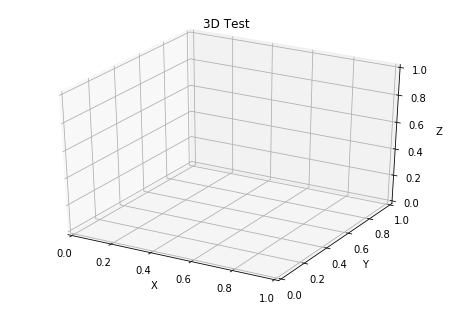

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3
import matplotlib.animation as animation

# Fixing random state for reproducibility
np.random.seed(19680801)


def Gen_RandLine(length, dims=2):
    """
    Create a line using a random walk algorithm

    length is the number of points for the line.
    dims is the number of dimensions the line has.
    """
    lineData = np.empty((dims, length))
    lineData[:, 0] = np.random.rand(dims)
    for index in range(1, length):
        # scaling the random numbers by 0.1 so
        # movement is small compared to position.
        # subtraction by 0.5 is to change the range to [-0.5, 0.5]
        # to allow a line to move backwards.
        step = ((np.random.rand(dims) - 0.5) * 0.1)
        lineData[:, index] = lineData[:, index - 1] + step

    return lineData


def update_lines(num, dataLines, lines):
    for line, data in zip(lines, dataLines):
        # NOTE: there is no .set_data() for 3 dim data...
        line.set_data(data[0:2, :num])
        line.set_3d_properties(data[2, :num])
    return lines

# Attaching 3D axis to the figure
fig = plt.figure()
ax = p3.Axes3D(fig)

# Fifty lines of random 3-D lines
data = [Gen_RandLine(25, 3) for index in range(50)]

# Creating fifty line objects.
# NOTE: Can't pass empty arrays into 3d version of plot()
lines = [ax.plot(dat[0, 0:1], dat[1, 0:1], dat[2, 0:1])[0] for dat in data]

# Setting the axes properties
ax.set_xlim3d([0.0, 1.0])
ax.set_xlabel('X')

ax.set_ylim3d([0.0, 1.0])
ax.set_ylabel('Y')

ax.set_zlim3d([0.0, 1.0])
ax.set_zlabel('Z')

ax.set_title('3D Test')

# Creating the Animation object
line_ani = animation.FuncAnimation(fig, update_lines, 25, fargs=(data, lines),
                                   interval=50, blit=False)

plt.show()